In [1]:
# import needed packages
from datascience import *
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import pandas as pd
import math

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# MGSC404—Midterm Case Study

### Desautles Faculty of Management, McGill University
### February 29th,  2024

Gia Luong (261119805)

Donald Szeto (260403046)

Junzhe Zhou (260967720)

Kaibo Zhang (261110409)

## I. Introduction

American Office Systems Inc., originally an office supply store founded in 1939, transitioned into manufacturing office equipment and entered the copier market. Notably, the company introduced a pioneering product—copier-to-computer adapters that are compatible with IBM and Macintosh (Mac) systems. Despite the product's promising potential, the firm confronts multifaceted challenges, including restricted brand visibility and initial capital constraints. Navigating these challenges, the company faces urgent needs for astute management of production and marketing investments, strategies that it is short of at the current status quo. In the following sections, the report will explore AOS' financial constraints, cost and revenue structures, and market realities and build a sounding model to provide sounding suggestions for its capital allocations for fiscal year 1996. 

## II. Model Formulation

To maximize profits, a linear model is formulated and established to help the executive action team make a decision about how to allocate funds between production and advertising, ensuring that all cash flow, financial, accounting, marketing, inventory, and production considerations are taken into account. While the degree of which models adhere to real-life circumstances defines the reliability of the solution produced, to ensure that this model satisfy the immediate needs of use on the next executive meeting, the following assumptions are made.

#### Assumptions:

- The 15% interest rate of the 750,000 dollars line of credit for 1996 from Citibank is an annual rate that can be converted to quarterly rate (15%/4). The accured interest is paid at the end of each quarter. In addition, the company will borrow all of the avaliable credits from it and treat the amount as a lump sum loan.

- The 6% annual return on short-term government securities matures quarterly. Its quarterly rate can be computed as 6%/4.

- Due to lack of information about the company's cashflow in the previous year, the company is assumed to start blank in 1996 onward. All the past lines of credit have already been spent and fully paid back to the institution of issuance. Past investments have matured and gains on interests have deposited. 

- Except the 750,000 line of credit, the company has no other cash on its books or other funds for sustaining operations starting in year 1996.

- The factory has the capacity and capability to operate 12 hrs per day for 20 production days each month. 

- The 1% inventory carry-on cost for each month is calculated based on the COGs (their production variable cost) of the items in stock. Let $I_{a}$ denotes for the monetary value of monthly inventory. The monthly inventory cost is then calculated by 0.01·$I_{a}$. The quarterly inventory cost is the total cost of the three months: 0.01·$I_{1}$+0.01·$I_{2}$+0.01·$I_{3}$=0.01·($I_{1}+I_{2}+I_{3}$). Thus the quarterly inventory carry-on cost is also 1%.

- All cash flows occur at the end of the quarter.

- Adertisement efforts will reflect immediately on the maximum possible sales (maximum expected sales + advertisement effect) of the same quarter.

- All left cash on the company's book, including revenues earned from operation, will be directed toward short-term investments.

- When computing the total profit generated at the end of the year (4th quarter), the initial credit line of 750,000 will be deducted as loan payable, a liability account.

#### Decision Variable
- $Adv_{t}$ -> money allocated to advertisement in quarter t.
- $AdvIbm_{t}$ -> money allocated to advertising IBM adapters in quarter t.
- $AdvMac_{t}$ -> money allocated to advertising Mac adapters in quarter t.
- $Ibm_{t}$ -> number of IBM version adapters to produce in quarter t.
- $Mac_{t}$ -> number of Mac version adapters to produce in quarter t.
- $Prod_{t}$ -> money allocated to production in quarter t.
- $Sibm_{t}$ -> number of IBM version adapters sold in quarter t.
- $Smac_{t}$ -> number of Mac version adapters sold in quarter t.
- $InvIbm_{t}$ -> the inventory of IBM version adapters at the end of quarter t.
- $InvMac_{t}$ -> the inventory of Mac version adapters at the end of quarter t.
- $Invest_{t}$ -> excess money allocated to short-term government securities in quarter t.
- $Rev_{t}$ -> total operational revenue made in quarter t.

#### Parameters
- Let **$t \in \text{{1,2,3,4}}$** denotes for the end of quarters 1,2,3,4 of 1996, respectively.
- Let *Pibm* = 175 denotes for the price of one IBM version adapter.
- Let *Pmac* = 200 denotes for the price of one Mac version adapter.
- Let *Cibm* = 100 denotes for the cost of producing one IBM version adapter.
- Let *Cmac* = 110 denotes for the price of producing one Mac version adapter.
- Let *CreditCost* = 750000·(0.15/4) denotes for the quarterly the monthly interest costs from the loan.
- Let *CreditLine* = 750000 denotes for the inital credit line at the beginning of the year.
- The company holds beginning inventory of 10,000 IBM and 5,000 Macintosh adapters in quarter 1.

#### Objective Function

$$max \sum_{t=1}^{4} (0.06/4)·Invest_{t-1}+ Rev_{t} - Prod_{t} - Adv_{t} - 0.01·(Cibm·InvIbm_{t} + Cmac·InvMac_{t}) - CreditCost - FixedCost, ~\forall t$$

#### Constraints

1. Demand Constraints

- The sales of adapaters cannot exceed the maximum expected sales and the subsequent effects of advertisement of that quarter. The advertisement effect is defined as the maximum expected sales will increase by 1 unit for every 10 dollars spent in advertisement.

$$Sibm_{t} ≤ E[ibmDemand_{t}] + Adv_{t}/10,$$
$$Smac_{t} ≤ E[macDemand_{t}] + Adv_{t}/10$$

Algebraic Form：

$$ Sibm_{t} - AdvIbm_{t}/10 ≤ E[ibmDemand_{t}],$$
$$ Smac_{t} - AdvMac_{t}/10 ≤ E[macDemand_{t}]$$


2. Inventory Constraints

- The sales of adapters cannot exceed the number of items in hand.

$$Sibm_{t} ≤ InvIbm_{t-1} + Ibm_{t},$$ 
$$Smac_{t} ≤ InvMac_{t-1} + Mac_{t}$$

Algebraic Form：

$$InvIbm_{t-1} + Ibm_{t} - Sibm_{t} ≥ 0,$$ 
$$InvMac_{t-1} + Mac_{t} - Smac_{t} ≥ 0$$

- Inventory of each adapter is equal to the inventory of the previous quarter + number produced - number sold.

$$InvIbm_{t} = InvIbm_{t-1} + Ibm_{t} - Sibm_{t},$$
$$InvMac_{t} = InvMac_{t-1} + Mac_{t} - Smac_{t}$$

Algebraic Form：

$$InvIbm_{t-1} + Ibm_{t} - Sibm_{t} - InvIbm_{t} = 0,$$
$$InvIbm_{t-1} + Ibm_{t} - Sibm_{t} - InvMac_{t} = 0$$

3. Cashflow Constraints

- The total avaliable funds at the beginning of quarter 1 is 750,000 dollars. Excess funds, or money to be invested in short-term securities, is updated at the end of each quarter. For each quarter, money invested at the end of the last quarter will mature. Together with the revenue generated, operation costs, such as production, advertisement, inventory carry-on, and the loan's accured interest will be substracted to compute the excess fund. 

for t = 1:

$$ 750,000 + Rev_{1} - Pord_{1} - Adv_{1} - 0.01·(Cibm·InvIbm_{1} + Cmac·InvMac_{1}) - CreditCost - FixedCost = Invest_{1} $$

Algebraic Form：

$$ Invest_{1} - Rev_{1} + Pord_{1} + Adv_{1} + 0.01·(Cibm·InvIbm_{1} + Cmac·InvMac_{1}) + CreditCost + FixedCost = 750,000 $$

for t > 1:

$$(1 + 0.06/4)·Invest_{t-1} + Rev_{t} - Pord_{t} - Adv_{t} - 0.01·(Cibm·InvIbm_{t} + Cmac·InvMac_{t}) - CreditCost - FixedCost = Invest_{t}$$

Algebraic Form：

$$Invest_{t} - (1 + 0.06/4)·Invest_{t-1} - Rev_{t} + Pord_{t} + Adv_{t} + 0.01·(Cibm·InvIbm_{t} + Cmac·InvMac_{t}) + CreditCost + FixedCost = 0$$

4. Production Constraints

-  for t < 4, production plus the end-of-period inventory should be at least 10% larger than the estimated sales for the next period.

$$ Ibm_{t} + InvIbm_{t} ≥ 1.1·E[ibmDemand_{t+1}],$$ 
$$ Mac_{t} + InvMac_{t} ≥ 1.1·E[macDemand_{t+1}]$$

- for t < 4, production in each quarter cannot exceed the production capacity of 30 IBM adapters and 10 Macintosh adapters per hour.

$$  Ibm_{t} ≤ 30·12·20·3,$$
$$  Mac_{t} ≤ 10·12·20·3$$

- for t = 4, the inventory level plus production at the end of the fourth quarter should be at least twice the maximum expected sales for that quarter.

$$ Ibm_{4} + InvIbm_{4} ≥ 2·E[ibmDemand_{4}],$$ 
$$ Mac_{4} + InvMac_{4} ≥ 2·E[macDemand_{4}]$$


- for t = 4, the production capacity will increase by 10%.

$$ Ibm_{4} ≤ 1.1·30·12·20·3,$$
$$ Mac_{4} ≤ 1.1·10·12·20·3 $$

5. Variable Relationship Constraints

- Total Advertisement cost in quarter t is equal to the sum of the respective funds allocated to advertise each adapter.

$$ AdvIbm_{t} + AdvMac_{t} = Adv_{t}$$

Algebraic Form：

$$ AdvIbm_{t} + AdvMac_{t} - Adv_{t} = 0$$

- Production cost in quarter t is equal to the variable costs of each adapter times the number of each adapter produced.

$$ Cibm·Ibm_{t} +  Cmac·Mac_{t} = Prod_{t} $$

Algebraic Form：

$$ Cibm·Ibm_{t} +  Cmac·Mac_{t} - Prod_{t} = 0 $$

- Revenue in quarter t is equal to the total value of collectibles of account receivables.

$$ 0.75·Pibm·Sibm_{t} + 0.8·Pmac·Smac_{t} + 0.2·Pibm·Sibm_{t-1} + 0.11·Pmac·Smac_{t-1} + 0.03·Pibm·Sibm_{t-2} + 0.05·Pmac·Smac_{t-2} + 0.02·0.5·Pibm·Sibm_{t-3} + 0.04·0.5·Pmac·Smac_{t-3} = Rev_{t}$$

Algebraic Form：

$$ 0.75·Pibm·Sibm_{t} + 0.8·Pmac·Smac_{t} + 0.2·Pibm·Sibm_{t-1} + 0.11·Pmac·Smac_{t-1} + 0.03·Pibm·Sibm_{t-2} + 0.05·Pmac·Smac_{t-2} + 0.02·0.5·Pibm·Sibm_{t-3} + 0.04·0.5·Pmac·Smac_{t-3} - Rev_{t} = 0$$

6. Nonnegativity Constraints

$$ Adv_{t},AdvIbm_{t},AdvMac_{t},Ibm_{t},Mac_{t},Prod_{t},Sibm_{t},Smac_{t},InvIbm_{t},InvMac_{t},Invest_{t},Rev_{t} ≥ 0 $$

## III. Model Implementation

Based on the formulation, a linear optimization model is implemented and solved in Gurobi. 

### a. Data Importation
Before moving to the actual establishment, data collected and the estimates made by the members of the executive action team is imported as tables. 

**1.Fixed Cost:** The original the list of quarterly fixed operating expenses is replicated as below. However, for simplicity, this value is decreased to $0.15 million (150000).

In [2]:
# fixed cost table
cost = make_array(1500000,750000,750000,100000)
expense = make_array('Administrative Expense','Fixed Manufacturing Costs','Sales Agents’ Salaries','Depreciation')
fixedCost_tbl = Table().with_columns('Expense',expense,'Cost',cost)
fixedCost_tbl

Expense,Cost
Administrative Expense,1500000
Fixed Manufacturing Costs,750000
Sales Agents’ Salaries,750000
Depreciation,100000


**2.Maximum Expected Sales:** past sales data from the last three quarters of 1995 and the demand forecast made by the executive team are imported into the table as below. Data from Q1 1995 is excluded because it is irrelevent with AOS' operations in 1996. Its collectibles were fully collected at the end of Q4 1995.

In [3]:
# maximum expected sales for 1996
ibm = make_array(6000,7000,8000,9000,10000,11000,12000)
mac = make_array(1200,1400,1600,1800,2000,2200,2400)
quarter = make_array('1995 Q2','1995 Q3','1995 Q4','1996 Q1','1996 Q2','1995 Q3','1995 Q4')
demand = Table().with_columns('Quarter',quarter,'IBM',ibm,'Mac',mac)
demand

Quarter,IBM,Mac
1995 Q2,6000,1200
1995 Q3,7000,1400
1995 Q4,8000,1600
1996 Q1,9000,1800
1996 Q2,10000,2000
1995 Q3,11000,2200
1995 Q4,12000,2400


In [4]:
# demand
demand_ibm = demand.column('IBM')
demand_mac = demand.column('Mac')

**3.Account Receivable Rates:** The rates are recorded in the table below.

In [5]:
coll_ibm = make_array(0.75,0.20,0.03,0.02)
coll_mac = make_array(0.80,0.11,0.05,0.04)
qua = make_array('Current Quarter','Following Quarter','Third Quarter','Uncollectible')
coll = Table().with_columns('Quarter',qua,'IBM',coll_ibm,'Mac',coll_mac)
coll

Quarter,IBM,Mac
Current Quarter,0.75,0.8
Following Quarter,0.2,0.11
Third Quarter,0.03,0.05
Uncollectible,0.02,0.04


In [6]:
# collectible rate
coll_rate = {
    'ibm':coll_ibm,
    'mac':coll_mac
}

### b. Physical Model
The following section documents the related Python codes for model implementation. A list of id labels is created for future identification purposes.

In [7]:
# id label for vars
id_lbl = ['1995 Q2','1995 Q3','1995 Q4','1996 Q1','1996 Q2','1996 Q3','1996 Q4']

In [8]:
# sensitivity table function
def sensitivity_analysis_table(model) -> pd.DataFrame:
    # Ensure the model has been solved
    if model.Status != 2:  # Model status 2 is 'Optimized'
        raise ValueError("Model must be optimized before sensitivity analysis can be performed.")
    
    # Collecting sensitivity analysis for variables
    variables_data = {
        'Variable': [],
        'Optimal Value': [],
        'Reduced Cost': [],
        'Allowable Increase (Obj Coeff)': [],
        'Allowable Decrease (Obj Coeff)': []
    }
    for v in model.getVars():
        variables_data['Variable'].append(v.VarName)
        variables_data['Optimal Value'].append(v.X)
        variables_data['Reduced Cost'].append(v.RC)
        variables_data['Allowable Increase (Obj Coeff)'].append(v.SAObjUp)
        variables_data['Allowable Decrease (Obj Coeff)'].append(v.SAObjLow)
    
    variables_df = pd.DataFrame(variables_data)
    
    # Collecting sensitivity analysis for constraints
    constraints_data = {
        'Constraint': [],
        'Shadow Price': [],
        'Allowable Increase (RHS)': [],
        'Allowable Decrease (RHS)': []
    }
    for c in model.getConstrs():
        constraints_data['Constraint'].append(c.ConstrName)
        constraints_data['Shadow Price'].append(c.Pi)
        constraints_data['Allowable Increase (RHS)'].append(c.SARHSUp)
        constraints_data['Allowable Decrease (RHS)'].append(c.SARHSLow)
    
    constraints_df = pd.DataFrame(constraints_data)
 
    # Return both DataFrames separately
    return  variables_df, constraints_df

In [9]:
# Adapative function for LP model
def AOS(display:bool=False, price:tuple=(175,200), cost:tuple=(100,110), adv_eff:float=10, collect_rate:dict=coll_rate, rate_loan:float=0.15, inv_cushion:float=0.1, prodCap_Q4:float=0.1, creditLine:int=750000,demand_ibm=demand_ibm, demand_mac=demand_mac):
    FixedCost = 150000
    # price
    price_ibm = price[0]
    price_mac = price[1]
    
    # cost
    cost_ibm = cost[0]
    cost_mac = cost[1]
    
    # collectible rate
    
    coll_ibm = collect_rate['ibm']
    coll_mac = collect_rate['mac']
    
    # create model
    m = gp.Model()

    # cal credit cost
    CreditCost = creditLine*rate_loan/4

    # decision variables
    Adv = m.addVars(7, lb=0, name=[i+' Adv' for i in id_lbl])
    AdvIbm = m.addVars(7, lb=0, name=[i+' AdvIbm' for i in id_lbl])
    AdvMac = m.addVars(7, lb=0, name=[i+' AdvMac' for i in id_lbl])
    Ibm = m.addVars(7, lb=0,name=[i+' Ibm' for i in id_lbl])
    Mac = m.addVars(7, lb=0, name=[i+' Mac' for i in id_lbl])
    Prod = m.addVars(7, lb=0, name=[i+' Prod' for i in id_lbl])
    Sibm = m.addVars(7, lb=0, name=[i+' Sibm' for i in id_lbl])
    Smac = m.addVars(7, lb=0, name=[i+' Smac' for i in id_lbl])
    InvIbm = m.addVars(7, lb=0, name=[i+' InvIbm' for i in id_lbl])
    InvMac = m.addVars(7, lb=0, name=[i+' InvMac' for i in id_lbl])
    Invest = m.addVars(7, lb=0, name=[i+' Invest' for i in id_lbl])
    Rev = m.addVars(7, lb=0, name=[i+' Rev' for i in id_lbl])

    # constraints

    # start blank in 1996
    for t in range(3):
        m.addConstr(AdvIbm[t]==0)
        m.addConstr(AdvMac[t]==0)
        m.addConstr(Adv[t]==0)
        m.addConstr(Ibm[t]==0)
        m.addConstr(Mac[t]==0)
        m.addConstr(Invest[t]==0)
        m.addConstr(Rev[t]==0)

    for t in range(2):
        m.addConstr(InvIbm[t]==0)
        m.addConstr(InvMac[t]==0)

    # beginning of Q1 1996
    m.addConstr(InvIbm[2]==10000)
    m.addConstr(InvMac[2]==5000)

    # def rev
    for t in range(3,7):
        m.addConstr(Rev[t]==coll_ibm[0]*price_ibm*Sibm[t]+coll_mac[0]*price_mac*Smac[t]+coll_ibm[1]*price_ibm*(Sibm[t-1])+coll_mac[1]*price_mac*(Smac[t-1])+coll_ibm[2]*price_ibm*(Sibm[t-2])+coll_mac[2]*price_mac*(Smac[t-2])+coll_ibm[3]*0.5*price_ibm*(Sibm[t-3])+coll_mac[3]*0.5*price_mac*(Smac[t-3]))

    # def inventory 
    for t in range(3,7):
        m.addConstr(InvIbm[t-1]+Ibm[t]-Sibm[t]==InvIbm[t], name='inv_IBM '+id_lbl[t])
        m.addConstr(InvMac[t-1]+Mac[t]-Smac[t]==InvMac[t], name='inv_Mac '+id_lbl[t])

    # sales
    # actual sales in 1995
    for t in range(3):
        m.addConstr(Sibm[t]==demand_ibm[t]) 
        m.addConstr(Smac[t]==demand_mac[t])
    
    # def adv
    for t in range(3,7):
        m.addConstr(AdvIbm[t]+AdvMac[t]==Adv[t])
    
    # sales <= E[demand]+Adv effect
    for t in range(3,7):
        m.addConstr(Sibm[t]<=demand_ibm[t]+(AdvIbm[t]/adv_eff), name='demand_IBM '+id_lbl[t])
        m.addConstr(Smac[t]<=demand_mac[t]+(AdvMac[t]/adv_eff), name='demand_Mac '+id_lbl[t])

    # sales <= Inventory in stock
    for t in range(3,7):
        m.addConstr(Sibm[t]<=InvIbm[t-1]+Ibm[t], name='stock_IBM '+id_lbl[t])
        m.addConstr(Smac[t]<=InvMac[t-1]+Mac[t], name='stock_Mac '+id_lbl[t])

    # def production cost
    for t in range(7):
        m.addConstr(cost_ibm*Ibm[t]+cost_mac*Mac[t]==Prod[t])

    # def cashflow
    # inital credit 750000
    # excess funds in quarter 1
    m.addConstr(Invest[3]+Prod[3]+Adv[3]+CreditCost+FixedCost+0.01*(cost_ibm*InvIbm[3]+cost_mac*InvMac[3])==creditLine+Rev[3], name='Invest '+id_lbl[3])
    # excess funds in quarter 2-4
    for t in range(4,7):
        m.addConstr(Invest[t]+Prod[t]+Adv[t]+CreditCost+FixedCost+0.01*(cost_ibm*InvIbm[t]+cost_mac*InvMac[t])==(1+0.06/4)*Invest[t-1]+Rev[t], name='Invest '+id_lbl[t])


    # production
    # t<4
    for t in range(3,6):
        m.addConstr(Ibm[t]+InvIbm[t]>=(1+inv_cushion)*demand_ibm[t+1], name='prod_IBM '+id_lbl[t])
        m.addConstr(Mac[t]+InvMac[t]>=(1+inv_cushion)*demand_mac[t+1], name='prod_Mac '+id_lbl[t])

    for t in range(3,6):
        m.addConstr(Ibm[t]<=30*12*20*3, name='capacity_IBM '+id_lbl[t])
        m.addConstr(Mac[t]<=10*12*20*3, name='capacity_Mac '+id_lbl[t])

    # t=4
    m.addConstr(Ibm[6]+InvIbm[6]>=2*demand_ibm[6], name='prod_IBM '+id_lbl[6])
    m.addConstr(Mac[6]+InvMac[6]>=2*demand_mac[6], name='prod_Mac '+id_lbl[6])

    m.addConstr(Ibm[6]<=(1+prodCap_Q4)*30*12*20*3, name='capacity_IBM '+id_lbl[6])
    m.addConstr(Mac[6]<=(1+prodCap_Q4)*10*12*20*3, name='capacity_Mac '+id_lbl[6])

    # objective function: max(profit)
    m.setObjective(gp.quicksum((0.06/4)*Invest[t-1]+Rev[t]-Adv[t]-Prod[t]-0.01*(cost_ibm*InvIbm[t]+cost_mac*InvMac[t])-CreditCost-FixedCost  for t in range(3,7)), GRB.MAXIMIZE)

    status = m.optimize()
    
    print()
    print('Optimal Values for Decision Variables:')
    adv = [0] * 7
    advibm = [0] * 7
    advmac = [0] * 7
    ibm = [0] * 7
    mac = [0] * 7
    prod = [0] * 7
    sibm = [0] * 7
    smac = [0] * 7
    invibm = [0] * 7
    invmac = [0] * 7
    invest = [0] * 7
    rev = [0] * 7

    for t in range(7):
        adv[t]=Adv[t].x  
        advibm[t]=AdvIbm[t].x
        advmac[t]=AdvMac[t].x
        ibm[t]=Ibm[t].x
        mac[t]=Mac[t].x
        prod[t]=Prod[t].x
        sibm[t]=Sibm[t].x
        smac[t]=Smac[t].x
        invibm[t]=InvIbm[t].x
        invmac[t]=InvMac[t].x
        invest[t]=Invest[t].x
        rev[t]=Rev[t].x
        
    var_dict = {'ADV':adv,
                'ADV_IBM':advibm,
                'ADV_MAC':advmac,
                'IBM':ibm,
                'MAC':mac,
                'PROD':prod,
                'SIBM':sibm,
                'SMAC':smac,
                'INVIBM':invibm,
                'INVMAC':invmac,
                'INVEST':invest,
                'REV':rev}
    
    if display==True:
        i=1
        for v in m.getVars(): 
            if i < 7:
                i+=1
                if v.varName[0:4]!='1995' or v.varName[0:7]=='1995 Q4':
                    if v.varName[8:] in ['Ibm','Mac','Sibm','Smac','InvIbm','InvMac']:
                        print(f'%s: %g ' %(v.varName,math.floor(v.x)), end='| ')
                    else: 
                        print(f'%s: %g ' %(v.varName,v.x), end='| ')

            else:
                i=1
                if v.varName[0:4]!='1995' or v.varName[0:7]=='1995 Q4':
                    if v.varName[8:] in ['Ibm','Mac','Sibm','Smac','InvIbm','InvMac']:
                        print(f'%s: %g ' %(v.varName,math.floor(v.x)))
                    else: 
                        print(f'%s: %g ' %(v.varName,v.x))
                print()
            
    print(f'The objective value achieved in profit: {round(m.objVal,2)} dollars')
    
    variables_df, constraints_df = sensitivity_analysis_table(m)
    
    return status, variables_df, constraints_df, var_dict
    
    

### c. Optimal Solution
As displayed in the summary output below, the original solution yields an achieved profit of 9311204.7 dollars. The solution of each of the decision variables is also shown. 

The output suggests that the optimal strategy for the company is to fully utilize its production capacity and avoid accumulating excess inventory for the following managerial insights and reasons:

1. Optimize Production Capacity Utilization: Given the option of achieving sales volumes beyond the estimated demand through advertisements, the company should strive to maximize the utilization of its production capacity. Take IBM adapters, one of the company's product line, as an example. Only taking the variable costs into consideration, the per unit profit of sales beyond the expected demand is 65 (175-100-10). This implies that as long as the advertisement effect remain fixed throughout the year, AOS will gain positive profits from producing and selling items that are not included in the demand predicions. In addition, if taking the quarterly fixed cost into consideration, utilizing all of the production capacities can also help to achieve economies of scales as ATC attenuates with increased productions.

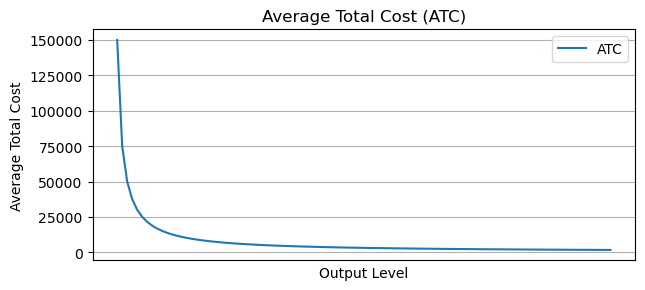

In [10]:
# graph display for reduced ATC as output expands
output_levels = np.arange(1, 101)


fixed_costs = 150000  
variable_costs_per_unit = 100  

# Calculate average total cost (ATC) for each output level
total_costs = fixed_costs + (variable_costs_per_unit * output_levels)
average_costs = total_costs / output_levels

# Plot the average total cost (ATC) curve
plt.figure(figsize=(7, 3))
plt.plot(output_levels, average_costs, label='ATC')
plt.title('Average Total Cost (ATC)')
plt.xlabel('Output Level')
plt.ylabel('Average Total Cost')
plt.legend()
plt.grid(True)
plt.xticks([]) 
plt.show()

2. Dynamic Inventory Management: The presence of zeros in the inventory variables ("InvIbm" &. "InvMac") indicates a strategic decision influenced by the cost analysis. Specifically, it suggests that the cost associated with selling additional items beyond the demand predictions outweighs the cost of holding those items in stock. Consequently, the optimal strategy for the company is to avoid accumulating excess inventory. Implementing a dynamic inventory management approach becomes crucial. In short, instead of stockpiling inventory, the company should focus on maintaining lean inventory levels to minimize holding costs while ensuring adequate supply by the to the safety cushion to meet demand fluctuations. 

In [11]:
# original solution output display
status_or, variables_df, constraints_df, var_dict = AOS(display=True)
df_original = pd.DataFrame(var_dict, index = id_lbl)[3:]
# display(variables_df[~variables_df['Variable'].str.contains('1995')])
# display(constraints_df[constraints_df['Constraint'].str.contains('Q')])

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-03
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0xfac5ea50
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    9.3112047e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.311204701e+06

Optimal Values for

## IV. Sensitivity Analysis Under Different Assumptions

### a. Variability in Price

The original solution for the decision variables is solved based on the expectation that market prices for the adapters remain static at 175 and 200 per unit for the IBM and Mac variants, respectively. However, these initial estimations may be inherently biased and consequently decrease the reliability of the model. Therefore, to gain a more comprehensive acknowledgement of the model's sensitivity to change, variance is manually added by re-running the model under different pricing scenarios: 

1.  a slight decrease in price to (173,198)

2. a subsequent decrease to (172,197)

3. a minor increase to (179,204)

The results, as indicated by the following tables, are compared to the original solution by examining the differences in quarterly fund allocations and production decisions.

In [12]:
# analysis setup
price_q3a_scenario = (173,198)
price_q3b_scenario = (172,197)
price_q3c_scenario = (179,204)

#df Q3a
status_or_q3a, variables_df_q3a, constraints_df_q3a, var_dict_q3a = AOS(price=(price_q3a_scenario))
#df Q3b
status_or_q3b, variables_df_q3b, constraints_df_q3b, var_dict_q3b = AOS(price=(price_q3b_scenario))
#df Q3c
status_or_q3c, variables_df_q3c, constraints_df_q3c, var_dict_q3c = AOS(price=(price_q3c_scenario))

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0xf2cb0a19
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    9.0551982e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.055198223e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 9055198.22 dollars
Gurobi Opti

**1. Slight Decrease in Price to (173,198)**

A slight decrease in adapter pricing (IBM: 173, Mac: 198) has no impact on the amount of funds allocated to advertizing nor the quantity of the two adapters produced. Expected sales and inventory are also unaffected. As expected, a decline in revenues and excess funds allocated for investment in short-term securities is observed.

In [13]:
#Slight decrease in adapter prices (ibm: $173 and mac: $198).
print('Forecasted FY 1996 profits under a slight market price decrease scenario:', '${:,.2f}'.format(9055198.22))
df_p_q3a = pd.DataFrame(var_dict_q3a, index = id_lbl)[3:]
df_p_q3a-df_original

Forecasted FY 1996 profits under a slight market price decrease scenario: $9,055,198.22


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-71200.0000,-71200.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-132348.0000,-60080.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-191817.2200,-57484.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-256006.4783,-61312.0


**2. Subsequent Decrease to (172,197)**

A further pricing decrease (IBM: 172, Mac: 197) still fails to affect the optimal decisions for advertisement and production across all quarters. However, quarterly revenues continue to decline as the drop in price reduces AOS' room for value generation. Further decreases in excess funds are also observed as less revenue is earned on per unit sale of both adpaters.

In [14]:
#Minor decrease in adapter prices (ibm: $172 and mac: $197).
print('Forecasted FY 1996 profits under a moderate market price decrease scenario:', '${:,.2f}'.format(8927194.98))
df_p_q3b = pd.DataFrame(var_dict_q3b, index = id_lbl)[3:]
df_p_q3b-df_original

Forecasted FY 1996 profits under a moderate market price decrease scenario: $8,927,194.98


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-106800.00000,-106800.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-198522.00000,-90120.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-287725.83000,-86226.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-384009.71745,-91968.0


**3. Minor increase in price to (179,204)**

A moderate increase in price (IBM: 179, Mac: 197) also does not pose a strong enough shock to the model's output. As expected, the amount of excess funds and cash collected in each quarter grow in reversed pattern when there is a price reduction. 

In [15]:
#Minor increase in adapter prices (ibm: $179 and mac: $204).
print('Forecasted FY 1996 profits under a moderate market price increase scenario:', '${:,.2f}'.format(9.823217657e+06))
df_p_q3c = pd.DataFrame(var_dict_q3c, index = id_lbl)[3:]
df_p_q3c-df_original

Forecasted FY 1996 profits under a moderate market price increase scenario: $9,823,217.66


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142400.0000,142400.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264696.0000,120160.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,383634.4400,114968.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512012.9566,122624.0


**Conclusion**

Across all 3 simulated scenarios, there is, as expected, overall revenues change in the same direction prices for adapters change. This in turn affects the amount of excess cash flow that can be re-invested into short-term government securities. 

Notably, the solution of the decision variables remains static. In particular, core managerial decisions regarding advertisement and production are unaffected, indicating the model is resilient to minor changes in adapter market pricing. This strength most likely lies in AOS' ability to sell beyond the demand prediction ceiling and its existing cost structure. 

The presence of advertisement allows the firm to generate addtional revenues by utilizing all of its production capacity. In addition, the per unit cost of the adpaters at the status quo leaves plenty buffers to absorb the variance coming from market price fluctuations. Therefore, as long as prices do not fall below the threshold at which selling beyond expected demand becomes unprofitable, it is very likely that the optimal solution will remain unchanged.

In [16]:
# Table showing forecasted profits under various market price scenarios.
profits = make_array('${:,.2f}'.format(9.311204701e+06),'${:,.2f}'.format(9055198.22),'${:,.2f}'.format(8927194.98),'${:,.2f}'.format(9.823217657e+06))

# scenario_profit_table
Table().with_columns('Scenario',['Baseline','Slight Decrease','Moderate Decrease','Moderate Increase'],'Maximum Profit',profits,'Change in ADV &.PROD',make_array('-','F','F','F'))

Scenario,Maximum Profit,Change in ADV &.PROD
Baseline,"$9,311,204.70",-
Slight Decrease,"$9,055,198.22",F
Moderate Decrease,"$8,927,194.98",F
Moderate Increase,"$9,823,217.66",F


### b. Variability in Production Cost

The effects of cost inflation on adapter variable costs is another important factor to consider. The cost of production, similar to market prices, are prone to variance under real-world conditions. Two scenarios examining the effects of this change on the model are reflected in tables below.

In [17]:
#Setup for Q4.
cost_q4a_scenario = (101,111)
cost_q4b_scenario = (103,115)

#df Q4a
status_or_q4a, variables_df_q4a, constraints_df_q4a, var_dict_q4a = AOS(cost=(cost_q4a_scenario))
#df Q4b
status_or_q4b, variables_df_q4b, constraints_df_q4b, var_dict_q4b = AOS(cost=(cost_q4b_scenario))

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x1d912e1c
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    9.1905043e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.190504284e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 9190504.28 dollars
Gurobi Opti

**1. Rise in Variable Cost to (101,111)**

As adapter variable costs increase slightly, an increase in funds allocated to production is observed. Due to this need, a portion of the excess funds at the end of each quarter is directed towards production. This is necessary to maintain the same production level that fully utilizes the company's assets in order to maximize revenues and profits. Despite this change, all of the other decision variables remain the same. 

In [18]:
#Q4. a) change in cost to 101 and 111.
df_q4a = pd.DataFrame(var_dict_q4a, index = id_lbl)[3:]
df_q4a-df_original

,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,28800.0,0.0,0.0,0.0,0.0,-28800.0000,0.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,28800.0,0.0,0.0,0.0,0.0,-58032.0000,0.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,28800.0,0.0,0.0,0.0,0.0,-87702.4800,0.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,31680.0,0.0,0.0,0.0,0.0,-120700.4172,0.0


**2. Rise in Variable Cost to (103,115)**

Further increases in variable costs put additional pressure on cashflows as even more of it must be redirected to production. The achieved profit fall below 9 million (8888754.44). The decrease in excess funds over subsequent quarters is a linear combination of the interest no longer received from the funds that would have been re-invested into short-term securities, the correponding increase in carrying costs, and the amount directed towards production to cover the raise. However, the model still geneates the same set of insights about operational decisions. 

In [19]:
#Q4. b) change in cost to 103,115
df_q4b = pd.DataFrame(var_dict_q4b, index = id_lbl)[3:]
df_q4b-df_original

,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,100800.0,0.0,0.0,0.0,0.0,-100800.0000,0.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,100800.0,0.0,0.0,0.0,0.0,-203112.0000,0.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,100800.0,0.0,0.0,0.0,0.0,-306958.6800,0.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,110880.0,0.0,0.0,0.0,0.0,-422450.2602,0.0


**Conclusion**

Increases to adapter input costs reduces the amount of excess funds that can be re-invested. Rising costs also decreases the total achieved profits as the profit margin for each unit sold is reduced. Below is an illustration of the profit margin of sales beyond the predicted demand in absence of the change in costs. The green area represents the profit that AOS can potentially gain from each unit of sale. An increase in production costs, denoted by the blue region, will engulf a portion of the green area and change them to blue, reducing AOS' revenue generation ability. The model, as previously discussed, will produce the same set of optimal operational decisionsas long as the profit margin is not altered by great amount. It can be said that as long as the profit margins illustrated below remain positive, the model will not alter the solution by great amounts: it is resistent to minor fluctuations. This stability suggests that even if AOS encounters changes in cost structures in similar magnitutde during actual operations, continuing executing the optimal solution provided by the model still maximizes profit.

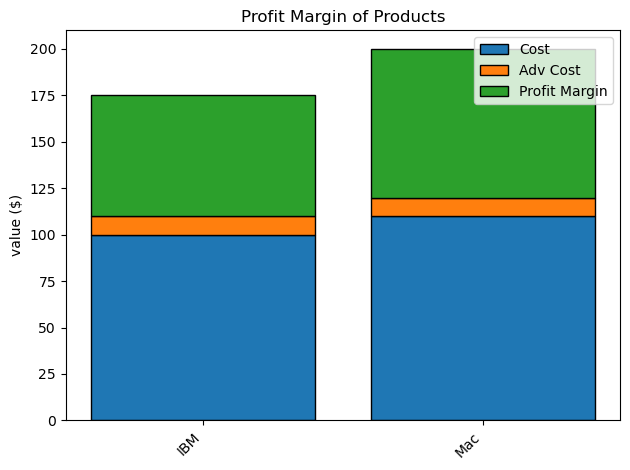

In [20]:
# profit margin graph
products = ['IBM', 'Mac']
costs = [100, 110]  
prices = [175, 200]  

additional_value = 10

# Create the figure and axis
fig, ax = plt.subplots()

bar1 = ax.bar(products, costs, label='Cost')
bar3 = ax.bar(products, [additional_value] * len(products), bottom=costs, label='Adv Cost')
bar2 = ax.bar(products, [price - cost - additional_value for price, cost in zip(prices, costs)], bottom=[cost + additional_value for cost in costs], label='Profit Margin')

# Add labels and title
ax.set_ylabel('value ($)')
ax.set_title('Profit Margin of Products')
ax.legend()

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### c. Plans with Rates of Account Receivables
The structure of accounts receivable is crucial for a company as it directly impacts its cash flow and financial health. A well-managed accounts receivable structure ensures timely collection of payments from customers, reducing the risk of bad debts and improving liquidity. Conversely, a disorganized or inefficient accounts receivable structure may lead to delayed payments, cash flow shortages, and increased borrowing costs. In the case of AOS, an improved lines of receivables is encourage instant collection of revenue and therefore increase the amount of excess fundsthat can be directed towards investments, generating addtional revenues while securing finacial health. However, whether plans to renovate the entire system is worthwhile to pursue still requires further discussion.

**1. A New Collection Procedure**

The new procedure shifts most of the second-level cash collections occurring in Q2 to Q1, resulting in immediate collection. This transformation streamlines the collection process, accelerating the conversion of accounts receivable into cash. The table of changes in decision variables mimics this result. In the first quarter, the revenue increase in the first quarter is accompanied by a simultaneous decrease in the second quarter. 

The alteration in account receivables rates also leads to a decline in revenue from Q3. This decrease might stem from the challenge of adjusting production plans to align with the new rates. Additionally, the surplus revenue generated from inventories at the year's outset could have artificially inflated income in subsequent quarters. 

Despite these parochial patterns that are specific to a quarterly basis, the increase in achieved profit 689104.89 (10000309.59-9311204.7) is significantly higher than the cost associated for renovation. Therefore, it is a worthwhile plan to pursue.

As a special note, the reversal in account receivables rates could impact the numerical valuation of outstanding collectibles from the preceding year, notably in 1995. Currently, the model is designed in a way that past collectibles will share the same rates as it is defined today. Given the reversal in account receivables rates, the model may no longer accurately calculate past receivables based on the previous rates, potentially introducing bias into the results. 


In [21]:
# q5a
new_R = {
    'ibm':make_array(0.9,0.07,0.01,1-sum((0.9,0.07,0.01))),
    'mac':make_array(0.92,0.03,0.01,1-sum((0.92,0.03,0.01)))
}

status_or_q5a, variables_df_q5a, constraints_df_q5a, var_dict_q5a = AOS(collect_rate=new_R)
df_q5a=pd.DataFrame(var_dict_q5a, index = id_lbl)[3:]
df_q5a-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0xdfdfe2f3
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    1.0000310e+07   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.000030959e+07

Optimal Values for Decision Variables:
The objective value achieved in profit: 10000309.59 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,879000.000000,879000.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,677085.000000,-215100.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,612241.275000,-75000.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,689104.894125,67680.0


**2. All Cash Collection**

Implementation of the all-cash strategy is assumed to cost $190k in total.

The forecasted effects on revenues are especially staggering within the first quarter of 1996 as it increases by nearly 1.5 million. In Q2 1996, a decline is observed. This can be attributed to the fact that the revenue that would have been received from the previous year is no longer included in the books of 1996. In addition, 20 percent of the sales from quarter 1 has completely shifted away from the cash collection in quarter 2. Q3 and Q4 are not so sensitive to this change as their amount of previous collections were comparably low under the original system.

The all-cash strategy improves AOS' financial health, as presented in the positive changes in the excess funds at the end of each quarter. This all-cash flow strategy may be especially lucrative in managing cashflow liquidity and reducing the use of or reliance on lines of credit. Overall profitability is also significantly affected on the upside, an increase of about 1.5 million. This change significantly out-competes its implementation cost.

However, a note of caution is required about the customers' aversed nature. Switching to an all-cash collection method may deter some customers and consequently decrease sales. While this strategy enhances the liquidity of the company, it may be seen as unacceptable to customers, as it could disrupt their financial planning. Customers accustomed to other payment methods may find the sudden shift inconvenient or impractical, potentially leading them to seek alternative suppliers or refrain from making purchases altogether. 

Therefore, although it is a recommended to pursue to pursue the plan, such a strategy requires careful consideration of its potential impact on customer satisfaction and long-term relationships. Balancing the need for liquidity with maintaining positive customer experiences is crucial for sustainable business growth.

In [22]:
# q5b
all_cash = {
    'ibm':make_array(1,0,0,0),
    'mac':make_array(1,0,0,0)
}

status_or_q5b, variables_df_q5b, constraints_df_q5b, var_dict_q5b = AOS(collect_rate=all_cash)
df_q5b=pd.DataFrame(var_dict_q5b, index = id_lbl)[3:]
df_q5b-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 201 nonzeros
Model fingerprint: 0xf898537e
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.01s
Presolved: 35 rows, 34 columns, 119 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    1.0797019e+07   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.079701934e+07

Optimal Values for Decision Variables:
The objective value achieved in profit: 10797019.34 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.489250e+06,1489250.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294339e+06,-217250.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.324054e+06,10300.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.485815e+06,141900.0


### d. Change in Advertisement Effectiveness

**1. Significant Change in Advertising Effectiveness (100)**

Change in advertising effect from 10 to 100 has huge impacts on the original solution. The new profit significantly shrinks from 9311204.7 to 3563775.34. As advertisement becomes more costly, the profit margin for selling beyond the predicted demand drops siginifcantly. Consequently, the numbers of IBM and Macintosh adapters sold across the quarters significantly decrease. 

In [23]:
status_q6a, variables_q6a_df, constraints_q6a_df, var_dict_q6a = AOS(adv_eff=100)
df_q6a = pd.DataFrame(var_dict_q6a, index = id_lbl)[3:]
df_q6a-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x05d376c1
Coefficient statistics:
  Matrix range     [1e-02, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9200000e+30   5.075000e+29   1.920000e+00      0s
      28    3.5637753e+06   0.000000e+00   0.000000e+00      0s

Solved in 28 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.563775342e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 3563775.34 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,-230000.0,-226000.0,-4000.0,-16600.0,-7200.0,-2452000.0,-22600.0,-9400.0,6000.0,2200.0,-1.796670e+06,-4470250.0
1996 Q2,-168000.0,-116000.0,-52000.0,-13550.0,-6090.0,-2024900.0,-11600.0,-5200.0,4050.0,1310.0,-2.988511e+06,-3352300.0
1996 Q3,-156000.0,-106000.0,-50000.0,-11525.0,-5435.0,-1750350.0,-10600.0,-5000.0,3125.0,875.0,-4.055376e+06,-2924300.0
1996 Q4,157100.0,-115200.0,272300.0,-7322.5,-3120.0,-1075450.0,-11520.0,-2245.0,7322.5,0.0,-5.747429e+06,-2542250.0


The below bar graph displays the proportion of sales resulted from advertisement of the total sales in the original solution. It is evident that sales volume from advertisement constitutes a significant portion of the total sales. This dependency is even more apparent in the sales of Mac adapters. Therefore, an unprecedented decrease in advertisement effectiveness, as expected, upends the central managerial decisions completely as it directly destablized the foundations of AOS' revenue generation. 

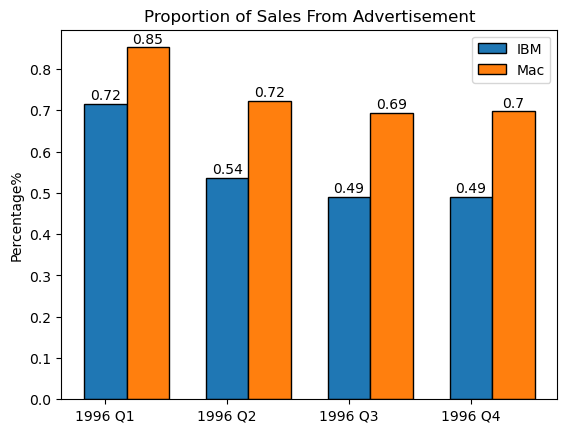

In [24]:
# demand comparison tbl
df_q6=df_q6a[['SIBM','SMAC']].copy()
df_q6['IBM']=ibm[3:]
df_q6['Mac']=mac[3:]
df_q6['Rev']=(df_q6a-df_original)['REV']

# sales proportion bar chaer
fig, ax = plt.subplots()
positions_ibm = range(len((df_q6['Mac']/df_original['SMAC']).index))
positions_mac = [pos + 0.35 for pos in positions_ibm]

bar1 = ax.bar(positions_ibm, 1-df_q6['IBM']/df_original['SIBM'],width=0.35, label='IBM')
bar2 = ax.bar(positions_mac, 1-df_q6['Mac']/df_original['SMAC'],width=0.35, label='Mac')
ax.set_ylabel('Percentage%')
ax.set_title('Proportion of Sales From Advertisement')
ax.set_xticks(range(len((df_q6['Mac']/df_original['SMAC']).index)))
ax.set_xticklabels((df_q6['Mac']/df_original['SMAC']).index)

for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom')
ax.legend()
plt.show()

The comparison table below presents that the actual sales determined by the model are almost in line with the demand forecasts. As selling beyond predicted demands becomes too costly, the model adjusts accordingly and reduces advertisement spending throughout the year by 48.14%. This change triggers a spontaneous drop in production levels and builds up in inventories. In the original solution, by the rule of thumb, production level was pushed to the ceiling to satisfy the safety cushion. The decrease in production level, as illustrated in the table below, forces the AOS to stock more items in order to continue meeting this requirement.

In [25]:
# tbl for sales and forecast
display(df_q6)
display((df_q6a-df_original)[['PROD','INVIBM','INVMAC']])
print('%Change in advertisement throughout the year:',sum((df_q6a-df_original)['ADV'])/sum(df_original['ADV']))

,SIBM,SMAC,IBM,Mac,Rev
1996 Q1,9000.0,2800.0,9000,1800,-4470250.0
1996 Q2,10000.0,2000.0,10000,2000,-3352300.0
1996 Q3,11000.0,2200.0,11000,2200,-2924300.0
1996 Q4,12000.0,5675.0,12000,2400,-2542250.0


,PROD,INVIBM,INVMAC
1996 Q1,-2452000.0,6000.0,2200.0
1996 Q2,-2024900.0,4050.0,1310.0
1996 Q3,-1750350.0,3125.0,875.0
1996 Q4,-1075450.0,7322.5,0.0


%Change in advertisement throughout the year: -0.4814410480349345


This pattern prevails in the decision for both product lines with an exception in Quarter 4. Surprisingly, the model chooses to allocate even more funds to boost the sales of Mac adapters to the extent that results in a positive change in Q4's total advertisement cost. As discussed earlier, the sales of Mac adpaters depends significantly on the additional customers acquired by the advertisement effect. The original prediction for the demand of Mac adapters is much lower than that of IBM's. This could be attributed to its relatively high pricing and a potentially limited customer base. However, with the assumption that advertisement works in the same degree for both adapters, advertisement efforts towards Mac adapters are, in general, more profitable than to be directed towards IBM adapters. Consequently, when AOS faces a slump in all perspectives with a sudden decrease in advertisement effectiveness, boosting sales for Mac adapters emerges as one of the few possible salvation plans. By strategically allocating resources to ramp up advertising for Mac adapters, AOS can capitalize on the potential for increased sales and profitability within this niche market segment, offering a pathway to mitigate the challenges posed by the broader downturn in advertising effectiveness.

In [26]:
display((df_q6a-df_original)[['ADV','ADV_IBM','ADV_MAC']])

,ADV,ADV_IBM,ADV_MAC
1996 Q1,-230000.0,-226000.0,-4000.0
1996 Q2,-168000.0,-116000.0,-52000.0
1996 Q3,-156000.0,-106000.0,-50000.0
1996 Q4,157100.0,-115200.0,272300.0


**2. Slight Change in Advertising Effectiveness (12.50)**

This change does not have much impact on the original solution. Particularly, AOS’s profit slightly declines slightly from 9311204.7 to 9099481.78. The money allocated to advertising increases as its cost increases. In the meantime, the money allocated to production and number of adapters sold remain unchanged throughout the year. Excess money allocated to short-term government securities across the quarters declines as the cost for the per unit sales beyond the predicted demand rises while the same number of sales were made.  

In [27]:
status_q6b, variables_q6b_df, constraints_q6b_df, var_dict_q6b = AOS(adv_eff=12.5)
df_q6b = pd.DataFrame(var_dict_q6b, index = id_lbl)[3:]
df_q6b-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0xec822a52
Coefficient statistics:
  Matrix range     [8e-02, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    9.0994818e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.099481785e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 9099481.78 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,82500.0,56500.0,26000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-82500.000000,0.0
1996 Q2,42000.0,29000.0,13000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-125737.500000,0.0
1996 Q3,39000.0,26500.0,12500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-166623.562500,0.0
1996 Q4,42600.0,28800.0,13800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-211722.915938,0.0


**Conclusion**

Advertising effectiveness is a key factor in optimizing the objective of AOS. As the advertising cost highly goes up, core managerial decisions regarding advertising, production, revenue and short-term securities are affected. The solution of decision variables are negatively correlated to the advertising cost, indicating the model is very sensitive to major changes in advertising cost. However, on the contray, if the change does not absorb all of the profit margins that advertisement can bring to the firm, the model remains resilient. Therefore, a sounding estimation of advertisement effectiveness is crucial for AOS to accomplish its plan. Otherwise, the production plan will become obsolete, and AOS will be incur a huge loss in profit as in the first scenario.

### e. Uncertainty with Credit Line

As mentioned in the introduction, poor financial situation of the company may impede it from obtaining the inital credit line for opening operations. An alternative would be to one for the same amount from a small local bank but subjecting to a much higher interest rate of 24%. However, contrary to one may expect, the results are not in particular troublesome. 

Higher interest rate on the line of credit directly influences the cost of borrowing for AOS since the companies have to bear a higher interest pay-off throughout the year. Under this circumstance, the elevated interest rate reduces the available cash flow for reinvestment. Despite this change, all the other production and advertisement decisions remain unchanged. 

Nevertheless, even if a 9% increase in the interest rate does not have a dramatic impact on AOS, the reduction in profits is undeniable. In other words, the financial situation of the AOS could be significantly altered if the rate is subjecting to a more noticeable change. With less excess funds at hand, AOS becomes more vulnerable to unexpected shocks in the market (i.e. market crash). All in all, addressing the higher interest rate challenge requires a multifaceted strategy that goes beyond seeking additional credit lines. For instance, AOS can better position itself by having a more diversified productlines to enhance its revenue generation ability. Investing in new market opportunities and product innovation can provide the necessary leverage to enhance profitability and ensure long-term financial stability, which is a possible path for future planning.

In [28]:
status_q7, variables_q7_df, constraints_q7_df, var_dict_q7 = AOS(rate_loan=0.24)
df_q7 = pd.DataFrame(var_dict_q7, index = id_lbl)[3:]
df_q7-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x9aa5fe4c
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    9.2421707e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.242170706e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 9242170.71 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16875.000000,0.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34003.125000,0.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-51388.171875,0.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-69033.994453,0.0


### f. Revision in Safety Cushion
The purpose of having an inventory cushion is to provide a safety net against unexpected fluctuations in demand, supply chain disruptions, or production delays. By maintaining an inventory buffer, a company can fulfill customer orders promptly, avoid stockouts, and prevent potential loss of sales due to inventory shortages. While a raise in this threshold may imply stability, a larger inventory cushion may result in increased carrying costs and additional fund allocated to production to meet the quotas, reducing the availability of funds for other investments or operational needs. With this picture in mind, the following analysis will investigate whether the model's behavior adhere to this general rule of thumb.

**1. A Safety Cushion Raise to 15%**

 As this change is well within the allowable increase threshold of the sensitivity table below, shadow prices can be directly used to analyze the possible impacts on the solution. Shadow prices of zero implies that the adjustment of the safety cushion to 15% does not impact AOS's operational or financial decisions at all. This is because the production decisions, as determined by the optimization model, already pushed production to its maximum capacity, far exceeding the requirements set by both the original and the adjusted safety cushions. Therefore, the increase to 15% does not necessitate a change in production quantities or financial allocations. This indicates that the production strategy is robust against minor fluctuations in inventory safety levels, focusing on maximizing revenue generation while minimizing excess inventory costs. In short, this highered threshold is not significant.

In [29]:
display(constraints_df[constraints_df['Constraint'].str.contains('prod')][:5])
# display for change
display(demand.select('IBM','Mac').to_df()[3:]*0.15)

,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
76,prod_IBM 1996 Q1,0.0,21600.0,-inf
77,prod_Mac 1996 Q1,0.0,7200.0,-inf
78,prod_IBM 1996 Q2,0.0,21600.0,-inf
79,prod_Mac 1996 Q2,0.0,7200.0,-inf
80,prod_IBM 1996 Q3,0.0,21600.0,-inf


,IBM,Mac
3,1350.0,270.0
4,1500.0,300.0
5,1650.0,330.0
6,1800.0,360.0


**2.A Safety Cushion Raise to 20%**

Based on the tables listed below, shadow prices are still valid for analysis. Although the inventory cushion doubled for the new solution, the optimal solution is not affected because the constraints for safety cushion were not binded under the original condition. The initial production plan puts the factory operating at its highest level, exceeding the buffer or safety margin by a large amount. Therefore, the impact on AOS is not siginifant.

However, it is unwise to turn a blind eye at the impacts of increasing of safety cushions. If a change in inventory cushion is accompanied by a change in production capacity and advertisement effectivess, the overall impact on AOS will be devastating.

In [30]:
display(constraints_df[constraints_df['Constraint'].str.contains('prod')][:5])
# display for change
display(demand.select('IBM','Mac').to_df()[3:]*0.2)

,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
76,prod_IBM 1996 Q1,0.0,21600.0,-inf
77,prod_Mac 1996 Q1,0.0,7200.0,-inf
78,prod_IBM 1996 Q2,0.0,21600.0,-inf
79,prod_Mac 1996 Q2,0.0,7200.0,-inf
80,prod_IBM 1996 Q3,0.0,21600.0,-inf


,IBM,Mac
3,1800.0,360.0
4,2000.0,400.0
5,2200.0,440.0
6,2400.0,480.0


**Conclusion**

Implications that are decoupled from quantitative results as shown above, the pros and cons of a higher inventory cushion is listed as follows:

- PROS:

Enhanced Service Level: By raising the safety stock, AOS greatly lowers the chance of running out of items, helping it fulfill customer orders more dependably. This boost in reliability can maintain customer loyalty, which is vital in a competitive environment.

Risk Mitigation: A larger safety stock serves as a protective barrier against problems with getting supplies or sudden increases in demand. During periods when suppliers are unreliable or market conditions change quickly, this can shield AOS from major operational and financial troubles.

- CONS:

Increased Holding Cost: Keeping more inventory means AOS faces higher expenses for storage, insurance, and the risk of products becoming outdated, which can reduce the company's profit margins. The company must assess if the benefits of improved service justify these extra costs.

Capital Allocation: The money spent on additional inventory could have been used for other purposes, like investing in new opportunities or paying off debt. AOS needs to think about the opportunity cost of having a larger safety stock.

In summary, AOS may revisit its inventory strategy to balance the advantages of a safety stock against its costs. While increase in safety cushion alone may not have any impacts in the short term, it is essential for AOS to remain flexible, keeping an eye on market changes and adapting its inventory accordingly.

### g. Unfortuante Crash in Production Capacity

**1. Delay in Renovation**

A delay in renovation plan will decrease the production capacity in Q4 by 2160 and 720 for IBM and Mac, respectively (0.1⋅[30,10]⋅12⋅20⋅3). This is within the allowable change of the shadow prices. Therefore, this change is expected decrease the achieved profit of the objective function by 338760(720⋅40+143.5⋅2160). The resulting achived profit shrinks to 8972444.7 due to the impacts on sales in the fourth quarter. The production plan is focred to reduce as ceilings of production capacity is pushed down. The new model also shows the reduction in money for advertisement compared to the original solution. This happens because AOS does not have the capacity to supply for the additional sales yielded by advertising. This model optimizes revenue by increasing inventory for safety stock as the company experiences a loss in the number of adapters produced.

In [31]:
constraints_df[constraints_df['Constraint'].str.contains('capacity')][6:]

,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
90,capacity_IBM 1996 Q4,143.5,24000.0,18000.0
91,capacity_Mac 1996 Q4,40.0,inf,4800.0


In [32]:
status_q9a, variables_q9a_df, constraints_q9a_df, var_dict_q9a = AOS(prodCap_Q4=0)
df_q9a = pd.DataFrame(var_dict_q9a, index = id_lbl)[3:]
df_q9a-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x2402ee64
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    8.9724447e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.00 seconds (0.00 work units)
Optimal objective  8.972444701e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 8972444.7 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996 Q4,-50400.0,-43200.0,-7200.0,-2160.0,-720.0,-295200.0,-4320.0,-720.0,2160.0,0.0,-338760.0,-682200.0


**2. Production Capacity drops by 10%**

The capacity rate decreases by 10% in the fourth quarter, leading to a decrease of 4320 and 1440 for IBM's and Mac's production capacity, respectively. Seeing that the magnitude of change is still contained by the sensitivity table below, it is still valid to use the shadow prices to make implications. 

The decreasing production capacity in the fourth quarter results in the profit decline from 9311204.7 to 8633684.7, a total reduction of 677520 (1440⋅40+143.5⋅4320). Indeed, the last quarter of 1996 is very important for AOS to reach its objective, as demand in this quarter is the highest across all quarters. Greater potentials also imply greater variability, so a minor drop in production capacity results in relatively huge drop in sales and revenues. Consequently, the allocation of money on advertising and production also decreases. The model aims to optimize AOS' profit by boosting sales in the fourth quarter, but limited production capacity restrains that from happening.

In [33]:
constraints_df[constraints_df['Constraint'].str.contains('capacity')][6:]

,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
90,capacity_IBM 1996 Q4,143.5,24000.0,18000.0
91,capacity_Mac 1996 Q4,40.0,inf,4800.0


In [34]:
status_q9b, variables_q9b_df, constraints_q9b_df, var_dict_q9b = AOS(prodCap_Q4=-0.1)
df_q9b = pd.DataFrame(var_dict_q9b, index = id_lbl)[3:]
df_q9b-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x0b30f65b
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 6e+05]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      18    8.6336847e+06   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.633684701e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 8633684.7 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996 Q4,-100800.0,-86400.0,-14400.0,-4320.0,-1440.0,-590400.0,-8640.0,-1440.0,4320.0,0.0,-677520.0,-1364400.0


**Conclusion**

In overall, revenues are positively correlated to change in capacity rate change. Throughout all scenarios, the production capacity constraints remain binded. Inevitably, a change in the RHS will impact the profit achieved by the objective function. In both scenarios, sales dropped suddenly in the fourth quarter. Thus, two scenarios show the model is not resilient to minor changes in production capacity. Luckily, the reduction in production capacity is assumed to only happen in Q4, which explains why the numbers in the first three quarters of the year remain unaffected. In other words, if AOS experiences a drastic supply shock that has a long-lasting reduction on the capacity of the factory across all quarters, the model will not produce sanguine results.

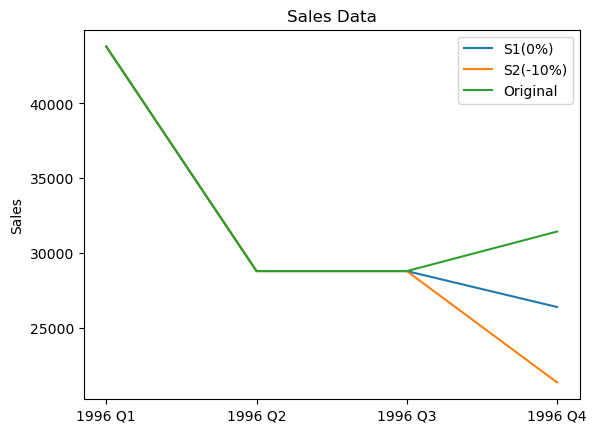

In [35]:
# line chart 
plt.plot(df_q9a['SIBM']+df_q9a['SMAC'], label='S1(0%)')
plt.plot(df_q9b['SIBM']+df_q9b['SMAC'], label='S2(-10%)')
plt.plot(df_original['SIBM']+df_original['SMAC'], label='Original')
plt.legend() 
plt.title('Sales Data')
plt.ylabel('Sales') 
plt.show()

### h. Forcast Erros in Maximum Estimated Demand
Regardless of the problem at hand, demand forcasting remains to be one of the fundamental steps for model building. Inaccurate demand forcasts can add undersirable noise to the model that ultimately obscure the accuracy and reliability of the optimized solution. However, whether to refine the forcast is still a managerial question in essence. Provided with the concerns about Lu's 1996 maximum expected sales forecasts, the company should hire an the marketing company if and only if the impact on the total profit from the refined numbers can outweigh the cost of doing so. From the description, Lu's prediction can be off by 1,000 for IBM adapters and 200 for Macintosh adapters each quarter. Since range is well within the allowable change range of the constraint table, the shadow prices are valid to use. From the constraint table in which only the demand constraint is extracted, the total expected impact on 1996's profit is approximately 49090.84, computed from the sum of the products between the shadow prices and their respective change, which is lower than 50,000, the cost for conducting a more detailed report. Therefore, even if the new forcast will bring an additional demand of 1,000 IBM and 200 Mac adapters, the incremental change in profit is lower than the cost of the report itself, making the effort unremunerative. In short, she should not hire the marketing research firm.

In [36]:
constraints_df[constraints_df['Constraint'].str.contains('demand')]

,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
49,demand_IBM 1996 Q1,10.456784,31600.0,-3.680625e+05
50,demand_Mac 1996 Q1,10.456784,12200.0,-3.752625e+05
51,demand_IBM 1996 Q2,10.302250,21600.0,-5.866309e+05
52,demand_Mac 1996 Q2,10.302250,7200.0,-5.946309e+05
53,demand_IBM 1996 Q3,10.150000,21600.0,-7.869379e+05
54,demand_Mac 1996 Q3,10.150000,7200.0,-7.957379e+05
55,demand_IBM 1996 Q4,10.000000,23520.0,-9.941205e+05
56,demand_Mac 1996 Q4,10.000000,7920.0,-1.003720e+06


In [37]:
print('The expected change on the objective function is $',sum(constraints_df[constraints_df['Constraint'].str.contains('demand_IBM')]['Shadow Price']*1000)+sum(constraints_df[constraints_df['Constraint'].str.contains('demand_Mac')]['Shadow Price']*200))

The expected change on the objective function is $ 49090.84049999999


### i. Need for Additional Loans
The AOS is also considering whether a new credit line of 1 million is needed to boost profits. Intuitively, it is generally believed that an additional credit line can be beneficial to a company. Beyond providing financial flexibility and acting as a safety net during unexpected expenses or economic downturns, it offers capital for seizing growth opportunities without delay. For rising businesses that are struggling to open brand reputations like AOS, an extra credit line helps smooth out cash flow gaps. Moreover, it serves as a vital resource during emergencies, enabling swift responses to unforeseen situations like equipment breakdowns or supply chain disruptions. However, whether this general belief applies to AOS' current standing is questionable. To have a thorough examination of the decision, it is nessecary to investigate its effects on the company's profit under various scenarios. 

**1. Ceteris Paribus**

Assuming the new credit line shares the same interest cost as the 750,000 and all the other conditions remain unchanged, a new optimization solution was computed. Contrary to the conventional wisdom that more funds generate more profit, the new solution yields an even lower achieved profits (9203474.2) than the original one (9311204.7). The table documenting the change in the optimal solution shows that almost all portions of the additional 1 million are allocated to short-term investments as excess funds while all the other decisions remain static. This is likely due to the fact that the production constaints for all quarters are binded, as provided in the sensitiviy table of the original solution. The initial 750,000 credit line already utilized all of the production capcity to its maximum. Since the quarterly interest on short-term investment is lower than the interest payable (0.06/4 < 0.15/4), the new line of credit is not only incapable of generating profits but is also adding extra burdens on the credit cost. Thus, if all the other conditions remain constant, a reduction in achieved profit is inevitable. 

In [38]:
# solution with the new credit line
status_cre, variables_cre_df, constraints_cre_df, var_dict_cre = AOS(creditLine = 1750000)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x01ba1d54
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 2e+06]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    9.2034742e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.203474199e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 9203474.2 dollars


In [39]:
df_cl = pd.DataFrame(var_dict_cre, index = id_lbl)[3:]
df_cl-df_original

,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,962500.000000,0.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,939437.500000,0.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,916029.062500,0.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,892269.498438,0.0


In [40]:
constraints_df[constraints_df['Constraint'].str.contains('capacity')]

,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
82,capacity_IBM 1996 Q1,65.357290,inf,11000.0
83,capacity_Mac 1996 Q1,78.642085,inf,2200.0
84,capacity_IBM 1996 Q2,62.667281,inf,12100.0
85,capacity_Mac 1996 Q2,73.539000,inf,2420.0
86,capacity_IBM 1996 Q3,56.568750,inf,13200.0
87,capacity_Mac 1996 Q3,62.600000,inf,2640.0
90,capacity_IBM 1996 Q4,143.500000,24000.0,18000.0
91,capacity_Mac 1996 Q4,40.000000,inf,4800.0


**2. Fluctuation in Price of Sales**

Similar observation is extended to the scenario in which the prices for the adapters decrease to 172 and 197 for the IBM and Macintosh versions, respectively. The achieved profit experiences a drop of 491740.22 (9311204.7-8819464.48) while all of the other decisions remain fixed. The wretched drop in prices reduces the AOS' ability in revenue generation. In the meantime, the additional 1 million credit line cannot be allocated to operations due to limited production capacity. The company will have no choice but to put them in short-term investments to minimize losses from the extra credit costs, hindering profits even further.

In [41]:
# solution with the new credit line
status_cp, variables_cp_df, constraints_cp_df, var_dict_cp = AOS(price=(172,197),creditLine = 1750000)
df_cp = pd.DataFrame(var_dict_cp, index = id_lbl)[3:]
df_cp-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x633c8d54
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 2e+06]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    8.8194645e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.819464482e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 8819464.48 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855700.000000,-106800.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,740915.500000,-90120.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,628303.232500,-86226.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,508259.780987,-91968.0


**3. Increase in Production Variable Costs**

The achieved profit experiences another decline of 530180.76 (9311204.7-8781023.94). The increase in variable costs exacerbates the detrimental impact of the additional line of credit on the company. The change table illustrates that money allocated to production rises while the total number of items produced remain constant. Lacking the ability to expand production and consequently continue along the curve of economies of scales to decrease ATC, the rise in production costs diminishes the company's cash collection capability and impairs its ability to mitigate the negative consequences of the extra credit line.

As variable costs escalate, more cash are required to finance the heightened expenses. This, in turn, restricts the funds available for short-term investments. Consequently, the losses incurred from credit costs are magnified, further compounded by a decline in revenue.

In essence, the company finds itself in a precarious position where the increased burden of financing elevated production costs erodes its financial flexibility and exacerbates the adverse effects of the additional credit line. 

In [42]:
# solution with the new credit line
status_co, variables_co_df, constraints_co_df, var_dict_co = AOS(cost=(103,115),creditLine = 1750000)
df_co = pd.DataFrame(var_dict_co, index = id_lbl)[3:]
df_co-df_original

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x2bd1145b
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 2e+06]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    8.7810239e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.781023939e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 8781023.94 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,0.0,0.0,0.0,0.0,0.0,100800.0,0.0,0.0,0.0,0.0,861700.000000,0.0
1996 Q2,0.0,0.0,0.0,0.0,0.0,100800.0,0.0,0.0,0.0,0.0,736325.500000,0.0
1996 Q3,0.0,0.0,0.0,0.0,0.0,100800.0,0.0,0.0,0.0,0.0,609070.382500,0.0
1996 Q4,0.0,0.0,0.0,0.0,0.0,110880.0,0.0,0.0,0.0,0.0,469819.238238,0.0


**4. Change in Advertisement Effectiveness**

Under the simulated scenario in which the advertisement effectiveness is reduced by 90% (10 to 100 $/sale), the damage caused by the extra credit line becomes more fatal to AOS (9311204.7 to 3456044.84). 

The higher threshold for advertising effectiveness translates to reduced sales volume. AOS experiences a notable decline in revenue across all quarters. In addition, the amount of money allocated to advertisement also decreases significantly. As the cost of advertising for pushing one unit of sales beyond the predicted demand rises, the inventory carry-on cost becomes negligible, making it more profitable to store the items instead. Facing lower demands, the company also have to adjust its production levels to align with the revised demand projections, resulting in decreased production costs and excess production capacity, as evident in the zero shadow prices of the capacity constraint. Lastly, the reduced cash collection negatively affects the company's ability to allocate funds towards investments. As seen in the table, the decrease in revenue is accompanied by a decrease in investments even with the additional credit line. 

It becomes too costly to beat the demand forecast to the point that keeping the money on the book becomes more desirable than spending the money on advertisements, which restricts the firm's operation while impeding the transformation of the extra line of credit into revenue. 

In [43]:
# solution with the new credit line
status_adv, variables_adv_df, constraints_adv_df, var_dict_adv = AOS(adv_eff=100,creditLine = 1750000)
df_adv = pd.DataFrame(var_dict_adv, index = id_lbl)[3:]
display(df_adv-df_original)
display(constraints_adv_df[constraints_adv_df['Constraint'].str.contains('capacity')])

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0xf8dbf132
Coefficient statistics:
  Matrix range     [1e-02, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 2e+06]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9200000e+30   5.075000e+29   1.920000e+00      0s
      28    3.4560448e+06   0.000000e+00   0.000000e+00      0s

Solved in 28 iterations and 0.01 seconds (0.00 work units)
Optimal objective  3.456044840e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 3456044.84 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,-230000.0,-226000.0,-4000.0,-16600.0,-7200.0,-2452000.0,-22600.0,-9400.0,6000.0,2200.0,-8.341700e+05,-4470250.0
1996 Q2,-168000.0,-116000.0,-52000.0,-13550.0,-6090.0,-2024900.0,-11600.0,-5200.0,4050.0,1310.0,-2.049074e+06,-3352300.0
1996 Q3,-156000.0,-106000.0,-50000.0,-11525.0,-5435.0,-1750350.0,-10600.0,-5000.0,3125.0,875.0,-3.139347e+06,-2924300.0
1996 Q4,157100.0,-115200.0,272300.0,-7322.5,-3120.0,-1075450.0,-11520.0,-2245.0,7322.5,0.0,-4.855160e+06,-2542250.0


,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
82,capacity_IBM 1996 Q1,0.0,inf,5000.0
83,capacity_Mac 1996 Q1,0.0,inf,0.0
84,capacity_IBM 1996 Q2,0.0,inf,8050.0
85,capacity_Mac 1996 Q2,0.0,inf,1110.0
86,capacity_IBM 1996 Q3,0.0,inf,10075.0
87,capacity_Mac 1996 Q3,0.0,inf,1765.0
90,capacity_IBM 1996 Q4,0.0,inf,16437.5
91,capacity_Mac 1996 Q4,0.0,inf,4800.0


**5. Change in Inventory Cushion**

As explained in the earlier section, an increase in the safety cushion for production and inventory for the first three quarters does not have an effect on the original solution. As presented in the constraint and the optimal solution table, production is still pushed to its maximum capacity, surpassing the cushion requirement by great amounts. In this case, each dollar spent can be transformed into revenue instead of being trapped to finance the inventory carry-on cost. Consequently, the additional credit line cannot be allocated to further enhance production and can only be directed towards short-term investments to minimize losses. This explains why the model yields the same achieved profit as the solution in which the same extra credit line is introduced while sharing the same cushion percentage with the original model. However, to the end, AOS still has to bear the additional credit cost coming from the extra credit line, which leads to lower achieved profit.

In [44]:
status_rinv, variables_rinv_df, constraints_rinv_df, var_dict_rinv = AOS(inv_cushion=0.2,creditLine = 1750000)
df_rinv = pd.DataFrame(var_dict_rinv, index = id_lbl)[3:]
display(df_rinv)
display(constraints_rinv_df[constraints_rinv_df['Constraint'].str.contains('prod')])

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0xd8d7fb18
Coefficient statistics:
  Matrix range     [1e-01, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 2e+06]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.8400000e+30   5.075000e+29   3.840000e+00      0s
      19    9.2034742e+06   0.000000e+00   0.000000e+00      0s

Solved in 19 iterations and 0.01 seconds (0.00 work units)
Optimal objective  9.203474199e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 9203474.2 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,330000.0,226000.0,104000.0,21600.0,7200.0,2952000.0,31600.0,12200.0,0.0,0.0,4.733125e+06,6480750.0
1996 Q2,168000.0,116000.0,52000.0,21600.0,7200.0,2952000.0,21600.0,7200.0,0.0,0.0,6.905747e+06,5437250.0
1996 Q3,156000.0,106000.0,50000.0,21600.0,7200.0,2952000.0,21600.0,7200.0,0.0,0.0,8.895408e+06,5209700.0
1996 Q4,170400.0,115200.0,55200.0,23760.0,7920.0,3247200.0,23520.0,7920.0,240.0,0.0,1.095347e+07,5558100.0


,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
76,prod_IBM 1996 Q1,0.00,21600.0,-inf
77,prod_Mac 1996 Q1,0.00,7200.0,-inf
78,prod_IBM 1996 Q2,0.00,21600.0,-inf
79,prod_Mac 1996 Q2,0.00,7200.0,-inf
80,prod_IBM 1996 Q3,0.00,21600.0,-inf
81,prod_Mac 1996 Q3,0.00,7200.0,-inf
88,prod_IBM 1996 Q4,-122.25,35520.0,23760.0
89,prod_Mac 1996 Q4,0.00,7920.0,-inf


**6. Need for an Addtional 8 Million**

In light of the simulated scenario where advertisement effectiveness drastically declines, AOS faces a substantial decrease in revenue and sales volume across all quarters. This sharp reduction in advertising effectiveness results in a diminished return on investment for advertising expenditure. Consequently, AOS reallocates resources away from advertising, opting instead to store items due to the negligible cost of carrying inventory. Adjusting production levels to align with reduced demand projections leads to decreased production plans and excess production capacity. Heretofore, the model responded the same way as it did with the 1 million credit line.

Anomalies arise from figures of achieved profit. The $8 million credit line presents an even more perplexing situation than adding 1 million, as the significant reduction in revenue makes it increasingly challenging to justify the need for additional credit when the primary issue lies in declining sales and advertising effectiveness. The influx of additional funds does help AOS to retain more excess funds throughout the year; however, the achieved profit is further damaged by the astronomical figures of the credit cost incurred, pure cost of 140000 (8M·(0.07/4)) per quarter with 0 revenue generation. 

Therefore, in this scenario, the proposed $8 million credit line appears redundant and may exacerbate the company's financial challenges rather than alleviating them.

In [45]:
# solution with the new credit line
status_adv, variables_adv_df, constraints_adv_df, var_dict_adv = AOS(adv_eff=100,creditLine = 8750000)
df_adv = pd.DataFrame(var_dict_adv, index = id_lbl)[3:]
display(df_adv-df_original)
display(constraints_adv_df[constraints_adv_df['Constraint'].str.contains('capacity')])

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: AMD Ryzen 7 6800HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 92 rows, 84 columns and 225 nonzeros
Model fingerprint: 0x0fc4f297
Coefficient statistics:
  Matrix range     [1e-02, 2e+02]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 8e+06]
Presolve removed 57 rows and 50 columns
Presolve time: 0.00s
Presolved: 35 rows, 34 columns, 131 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8800000e+30   5.150000e+29   2.880000e+00      0s
      27    2.7019313e+06   0.000000e+00   0.000000e+00      0s

Solved in 27 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.701931329e+06

Optimal Values for Decision Variables:
The objective value achieved in profit: 2701931.33 dollars


,ADV,ADV_IBM,ADV_MAC,IBM,MAC,PROD,SIBM,SMAC,INVIBM,INVMAC,INVEST,REV
1996 Q1,-230000.0,-226000.0,-4000.0,-16600.0,-7200.0,-2452000.0,-22600.0,-9400.0,6000.0,2200.0,5.903330e+06,-4470250.0
1996 Q2,-168000.0,-116000.0,-52000.0,-13550.0,-6090.0,-2024900.0,-11600.0,-5200.0,4050.0,1310.0,4.526989e+06,-3352300.0
1996 Q3,-156000.0,-106000.0,-50000.0,-11525.0,-5435.0,-1750350.0,-10600.0,-5000.0,3125.0,875.0,3.272856e+06,-2924300.0
1996 Q4,157100.0,-115200.0,272300.0,-7322.5,-3120.0,-1075450.0,-11520.0,-2245.0,7322.5,0.0,1.390727e+06,-2542250.0


,Constraint,Shadow Price,Allowable Increase (RHS),Allowable Decrease (RHS)
82,capacity_IBM 1996 Q1,0.0,inf,5000.0
83,capacity_Mac 1996 Q1,0.0,inf,0.0
84,capacity_IBM 1996 Q2,0.0,inf,8050.0
85,capacity_Mac 1996 Q2,0.0,inf,1110.0
86,capacity_IBM 1996 Q3,0.0,inf,10075.0
87,capacity_Mac 1996 Q3,0.0,inf,1765.0
90,capacity_IBM 1996 Q4,0.0,inf,16437.5
91,capacity_Mac 1996 Q4,0.0,inf,4800.0


#### Conclusion

In summary, an additional credit line is not desparately needed by AOS. The company's current production capacity is constrained, as evidenced by the utilization of the existing credit line. This limits the company's ability to efficiently convert additional funds into production outputs that can generate revenue. Consequently, if the firm is exposed to challenges such as fluctuating sales prices and increasing variable costs, simply injecting more funds into the company without addressing fixed production abilities would not lead to improved profitability. 

Moreover, the injection of redundant funds undermines the purpose of strategic investments for securing returns and enhancing financial stability. Unless the company can use these funds to expand its production facilities or invest in capital projects that boost production capabilities, the extra credit line would remain underutilized and even hinder profits because of accured interests.

Therefore, the conclusion emerges that under the current production capacity, the extra credit line is not needed at this juncture. Instead, the company should focus on addressing production capacity limitations, optimizing cost structures, and exploring avenues for strategic investments that can enhance its competitive position in the market.

### V. Conclusion

The linear optimization model suggests a set of solution that will help AOS to maximize profits under an array of estimations and assumptions. The model is exposed to variations in price, cost, production capacity, advertisement effectiveness, and production capacity, while the feasibility of new proposed plans for renovated collectibles rates and extra credit lines are assessed. In short, the model illustrates robustness in production planning and customer acquisition against general changes in price, cost, inventory cushion, rates of collectibles, credit costs, and the presence of the addtional credit line. However, it is overly sensitive with drastic changes in advertisement effectiveness.

### VI. Limitations

The formulated model is built upon various assumptions and data, which may become obsolete if market realities undergo drastic changes. In response to this potential concern, several limitations of the existing model are presented below. By acknowledging these constraints, stakeholders can adopt a more nuanced understanding of the model's predictive capabilities and make informed decisions regarding its implementation and reliance in real-world scenarios.

- **Quarterly matured investments:** To faciliate model formulation, short-term investments are assumed to mature quarterly. Subjecting to the executive team's requirement, all excess funds are reinvested. However, in reality, it is very unlikely for any company to leave no cash on its book as safety reserves. Therefore, AOS' real cashflow in the year of 1996 may deviates from what was computed by the model.


- **Factory Operation Capacity:** Constraints for factory capacity does not include potential downtimes or variability in worker productivity. In real operations, factories may face inefficiency in production process and fail to maintain operating at maximum theoretical capacity. 

- **Unitary Fixed Cost:** Given that a linear optimization formulation is selected, the current model assumes the fixed cost to be a real value that stays constant regardless of production decisions. Under real-life scenario, fixed cost can often be decomposed into several layers. If the company chooses to not produce in a specific time period, some of the fixed cost will not be active (i.e.manufacturing). If model formulation is based on the theoretical framework of mixed-integer, or even non-linear optimization, the concerns will be resolved.

- **Inventory Carry-on Cost:** The current inventory carry-on cost is calculated as a simple percentage of the variable cost of the items in stock. However, spoilage, obsolescence, and varying storage costs for different product lines may lead to varying costs.

- **Rule of Thumb for Safety Cushion:** To reduce inventory carry-on cost, the current safety cushion of AOS is based on the total number of items produced and at hand at the end of each quarter. The current model, adhering to this rule, chooses to escape the cost as much as possible by boosting production. This leaves AOS with zero inventory throughout most of the quarters, making it extremely fragile in front of accidental supply and demand shocks. The safety cushion under the current definition fails to protect the firm as it should have. Therefore, it is suggested that the safety cushion requirement should undergo a reformation that protects the company while not bringing siginificant burdens to AOS' operations. 


- **Immediate Effect of Advertisement on Sales:** The assumption that advertisement efforts immediately reflect on sales within the same quarter may not be realistic. Usually, it may take some period of time for the initial 'investment' to reach the expected growth of customer volume and community response.

- **Credit Line Assumption**: Since a linear optimization model framework is chosen, the model cannot include binary variables to denote for decisions such as how much to borrow below the limit and when to pay back the credits. The credit line secured is assumed to be used as a lump sum loan, ignoring its flexibility, which could provide more rooms for AOS' growth. Some may argue that such a model can also be realized in linear programming. However, with the special accounting method (all cashflow activities happen at the end of each quarter), the model with flexibilities in borrow options may lead to a set of results that let AOS to operate in all quarters without actually using the credit line since the operational profits can already be enough to finance all costs. However, it is very unrealistic for any company to initial operations with no cash on its books. The code for such a model is attached below for reference, but it is not the optimal model that this report recommend to pursue. 

In [ ]:
# LP model: reference use
def AOS_ref(display:bool=False, price:tuple=(175,200), cost:tuple=(100,110), adv_eff:float=10, collect_rate:dict=coll_rate, rate_loan:float=0.15, inv_cushion:float=0.1, prodCap_Q4:float=0.1, creditLine:int=750000,demand_ibm=demand_ibm, demand_mac=demand_mac):
    FixedCost = 150000
    # price
    price_ibm = price[0]
    price_mac = price[1]
    
    # cost
    cost_ibm = cost[0]
    cost_mac = cost[1]
    
    # collectible rate
    
    coll_ibm = collect_rate['ibm']
    coll_mac = collect_rate['mac']
    
    # create model
    m = gp.Model()

    # cal credit cost
    CreditCost = creditLine*rate_loan/4

    # decision variables
    Adv = m.addVars(7, lb=0, name=[i+' Adv' for i in id_lbl])
    AdvIbm = m.addVars(7, lb=0, name=[i+' AdvIbm' for i in id_lbl])
    AdvMac = m.addVars(7, lb=0, name=[i+' AdvMac' for i in id_lbl])
    Ibm = m.addVars(7, lb=0,name=[i+' Ibm' for i in id_lbl])
    Mac = m.addVars(7, lb=0, name=[i+' Mac' for i in id_lbl])
    Prod = m.addVars(7, lb=0, name=[i+' Prod' for i in id_lbl])
    Sibm = m.addVars(7, lb=0, name=[i+' Sibm' for i in id_lbl])
    Smac = m.addVars(7, lb=0, name=[i+' Smac' for i in id_lbl])
    InvIbm = m.addVars(7, lb=0, name=[i+' InvIbm' for i in id_lbl])
    InvMac = m.addVars(7, lb=0, name=[i+' InvMac' for i in id_lbl])
    Invest = m.addVars(7, lb=0, name=[i+' Invest' for i in id_lbl])
    Rev = m.addVars(7, lb=0, name=[i+' Rev' for i in id_lbl])
    borr = m.addVars(7, lb=0, name=[i+' borr' for i in id_lbl])
    pay_back= m.addVars(7, lb=0, name=[i+' pay_back' for i in id_lbl])
    cc = m.addVars(7, lb=0, name=[i+' cc' for i in id_lbl])

    # constraints

    # start blank in 1996
    for t in range(3):
        m.addConstr(AdvIbm[t]==0)
        m.addConstr(AdvMac[t]==0)
        m.addConstr(Adv[t]==0)
        m.addConstr(Ibm[t]==0)
        m.addConstr(Mac[t]==0)
        m.addConstr(Invest[t]==0)
        m.addConstr(Rev[t]==0)
        m.addConstr(pay_back[t]==0)
        m.addConstr(cc[t]==0)

    for t in range(2):
        m.addConstr(InvIbm[t]==0)
        m.addConstr(InvMac[t]==0)
        m.addConstr(borr[t]==0)

    # beginning of Q1 1996
    m.addConstr(InvIbm[2]==10000)
    m.addConstr(InvMac[2]==5000)
    m.addConstr(borr[2]<=creditLine)
    
    for t in range(3,7):
        m.addConstr(cc[t]==(borr[t-1]-pay_back[t-1]+borr[t-2]-pay_back[t-2]+borr[t-3]-pay_back[t-3])*rate_loan/4)
        m.addConstr(pay_back[t]<=borr[t-1]-pay_back[t-1]+borr[t-2]-pay_back[t-2]+borr[t-3]-pay_back[t-3])
        m.addConstr(borr[t]<=creditLine-borr[t-1]-borr[t-2]-borr[t-3]+pay_back[t]+pay_back[t-1]+pay_back[t-2]+pay_back[t-3])
        
    # def rev
    for t in range(3,7):
        m.addConstr(Rev[t]==coll_ibm[0]*price_ibm*Sibm[t]+coll_mac[0]*price_mac*Smac[t]+coll_ibm[1]*price_ibm*(Sibm[t-1])+coll_mac[1]*price_mac*(Smac[t-1])+coll_ibm[2]*price_ibm*(Sibm[t-2])+coll_mac[2]*price_mac*(Smac[t-2])+coll_ibm[3]*0.5*price_ibm*(Sibm[t-3])+coll_mac[3]*0.5*price_mac*(Smac[t-3]))

    # def inventory 
    for t in range(3,7):
        m.addConstr(InvIbm[t-1]+Ibm[t]-Sibm[t]==InvIbm[t], name='inv_IBM '+id_lbl[t])
        m.addConstr(InvMac[t-1]+Mac[t]-Smac[t]==InvMac[t], name='inv_Mac '+id_lbl[t])

    # sales
    # actual sales in 1995
    for t in range(3):
        m.addConstr(Sibm[t]==demand_ibm[t]) 
        m.addConstr(Smac[t]==demand_mac[t])
    
    # def adv
    for t in range(3,7):
        m.addConstr(AdvIbm[t]+AdvMac[t]==Adv[t])
    
    # sales <= E[demand]+Adv effect
    for t in range(3,7):
        m.addConstr(Sibm[t]<=demand_ibm[t]+(AdvIbm[t]/adv_eff), name='demand_IBM '+id_lbl[t])
        m.addConstr(Smac[t]<=demand_mac[t]+(AdvMac[t]/adv_eff), name='demand_Mac '+id_lbl[t])

    # sales <= Inventory in stock
    for t in range(3,7):
        m.addConstr(Sibm[t]<=InvIbm[t-1]+Ibm[t], name='stock_IBM '+id_lbl[t])
        m.addConstr(Smac[t]<=InvMac[t-1]+Mac[t], name='stock_Mac '+id_lbl[t])

    # def production cost
    for t in range(7):
        m.addConstr(cost_ibm*Ibm[t]+cost_mac*Mac[t]==Prod[t])

    # def cashflow
    # inital credit 750000
    # excess funds in quarter 1
    m.addConstr(Invest[3]+Prod[3]+Adv[3]+CreditCost+FixedCost+0.01*(cost_ibm*InvIbm[3]+cost_mac*InvMac[3])+cc[3]+pay_back[3]==borr[2]+borr[3]+Rev[3], name='Invest '+id_lbl[3])
    # excess funds in quarter 2-4
    for t in range(4,7):
        m.addConstr(Invest[t]+Prod[t]+Adv[t]+CreditCost+FixedCost+0.01*(cost_ibm*InvIbm[t]+cost_mac*InvMac[t])+cc[t]+pay_back[t]==(1+0.06/4)*Invest[t-1]+borr[t]+Rev[t], name='Invest '+id_lbl[t])


    # production
    # t<4
    for t in range(3,6):
        m.addConstr(Ibm[t]+InvIbm[t]>=(1+inv_cushion)*demand_ibm[t+1], name='prod_IBM '+id_lbl[t])
        m.addConstr(Mac[t]+InvMac[t]>=(1+inv_cushion)*demand_mac[t+1], name='prod_Mac '+id_lbl[t])

    for t in range(3,6):
        m.addConstr(Ibm[t]<=30*12*20*3, name='capacity_IBM '+id_lbl[t])
        m.addConstr(Mac[t]<=10*12*20*3, name='capacity_Mac '+id_lbl[t])

    # t=4
    m.addConstr(Ibm[6]+InvIbm[6]>=2*demand_ibm[6], name='prod_IBM '+id_lbl[6])
    m.addConstr(Mac[6]+InvMac[6]>=2*demand_mac[6], name='prod_Mac '+id_lbl[6])

    m.addConstr(Ibm[6]<=(1+prodCap_Q4)*30*12*20*3, name='capacity_IBM '+id_lbl[6])
    m.addConstr(Mac[6]<=(1+prodCap_Q4)*10*12*20*3, name='capacity_Mac '+id_lbl[6])

    # objective function: max(profit)
    m.setObjective(gp.quicksum((0.06/4)*Invest[t-1]+Rev[t]-Adv[t]-Prod[t]-0.01*(cost_ibm*InvIbm[t]+cost_mac*InvMac[t])-cc[t]-pay_back[t]-FixedCost  for t in range(3,7)), GRB.MAXIMIZE)

    status = m.optimize()
    
    print()
    print('Optimal Values for Decision Variables:')
    adv = [0] * 7
    advibm = [0] * 7
    advmac = [0] * 7
    ibm = [0] * 7
    mac = [0] * 7
    prod = [0] * 7
    sibm = [0] * 7
    smac = [0] * 7
    invibm = [0] * 7
    invmac = [0] * 7
    invest = [0] * 7
    rev = [0] * 7
    pb = [0]*7
    bor=[0]*7
    creditCost=[0]*7

    for t in range(7):
        adv[t]=Adv[t].x  
        advibm[t]=AdvIbm[t].x
        advmac[t]=AdvMac[t].x
        ibm[t]=Ibm[t].x
        mac[t]=Mac[t].x
        prod[t]=Prod[t].x
        sibm[t]=Sibm[t].x
        smac[t]=Smac[t].x
        invibm[t]=InvIbm[t].x
        invmac[t]=InvMac[t].x
        invest[t]=Invest[t].x
        rev[t]=Rev[t].x
        pb[t]=pay_back[t].x
        creditCost[t]=cc[t].x
        bor[t]=borr[t].x
        
    var_dict = {'ADV':adv,
                'ADV_IBM':advibm,
                'ADV_MAC':advmac,
                'IBM':ibm,
                'MAC':mac,
                'PROD':prod,
                'SIBM':sibm,
                'SMAC':smac,
                'INVIBM':invibm,
                'INVMAC':invmac,
                'INVEST':invest,
                'REV':rev,
               'PAY BACK':pb,
               'BORR':bor,
               'CC':creditCost}
    
    if display==True:
        i=1
        for v in m.getVars(): 
            if i < 7:
                i+=1
                if v.varName[0:4]!='1995' or v.varName[0:7]=='1995 Q4':
                    if v.varName[8:] in ['Ibm','Mac','Sibm','Smac','InvIbm','InvMac']:
                        print(f'%s: %g ' %(v.varName,math.floor(v.x)), end='| ')
                    else: 
                        print(f'%s: %g ' %(v.varName,v.x), end='| ')

            else:
                i=1
                if v.varName[0:4]!='1995' or v.varName[0:7]=='1995 Q4':
                    if v.varName[8:] in ['Ibm','Mac','Sibm','Smac','InvIbm','InvMac']:
                        print(f'%s: %g ' %(v.varName,math.floor(v.x)))
                    else: 
                        print(f'%s: %g ' %(v.varName,v.x))
                print()
            
    print(f'The objective value achieved in profit: {round(m.objVal,2)} dollars')
    
    variables_df, constraints_df = sensitivity_analysis_table(m)
    
    return status, variables_df, constraints_df, var_dict

## output present
# status_or, variables_df, constraints_df, var_dict = AOS_ref()
# pd.DataFrame(var_dict, index = id_lbl)[3:]